In [20]:
# Imported Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import confusion_matrix




# Initial exploration
## Loading the data

In [21]:
bigdata = pd.read_csv('/Users/enriccortesarbues/Documents/ESADE/Term 2/Artificial Intelligence 2/Classification Assigment/Loan_Lending_Club.csv')



/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/1280107277.py:1: DtypeWarning: Columns (48,58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  bigdata = pd.read_csv('/Users/enriccortesarbues/Documents/ESADE/Term 2/Artificial Intelligence 2/Classification Assigment/Loan_Lending_Club.csv')


## Analysing a 5% of the chunk

In [22]:
# Since the data is too big we are gonna start loading a small chunk of 5% of the rows

# Define the feature to balance 
balance_feature = 'loan_status'  

# Perform Stratified Sampling (10% of the dataset)
df, _ = train_test_split(bigdata, stratify=bigdata[balance_feature], test_size=0.95, random_state=42)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101497 entries, 1774212 to 1890021
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(2), object(34)
memory usage: 110.7+ MB


## Analysing the features 

### I've created this section to analyse the columns before dropping them mannually.

In [23]:
# Code to analyse the columns

# Get unique values and their counts
value_counts = df['loan_status'].value_counts()

# Display result
print(value_counts)

loan_status
Fully Paid            61954
Current               23007
Charged Off           15683
Late (31-120 days)      477
In Grace Period         282
Late (16-30 days)        76
Default                  18
Name: count, dtype: int64


In [24]:
columns_to_drop = [
'id', 'funded_amnt_inv', 'installment', 'sub_grade', 'emp_title', 'issue_d', 'url', 'title', 'zip_code', 'earliest_cr_line', 'mths_since_last_delinq', 
'mths_since_last_record', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
 'last_fico_range_low', 'last_fico_range_high', 'policy_code', 'tot_cur_bal', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'inq_fi', 'inq_last_12m',
   'acc_open_past_24mths', 'avg_cur_bal', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
     'mths_since_recent_revol_delinq', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'percent_bc_gt_75', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 
     'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
     'sec_app_collections_12_mths_ex_med', 'payment_plan_start_date', 'pymnt_plan', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_amount', 'hardship_start_date', 
     'hardship_end_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'addr_state'
]

# Get only columns that exist in df
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df = df.drop(columns=existing_columns)

# Check the remaining columns
print("Columns after dropping:", df.columns)


Columns after dropping: Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
       'total_cu_tl', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mort_acc', 'mths_since_recent_bc',
       'num_accts_ever_120_p

# Handling missing Values

In [25]:
# Replace missing values in float64 columns with 0
df.loc[:, df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).fillna(0)

# Replace missing values in object (categorical) columns with "Unknown"
df.loc[:, df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).fillna("Unknown")

# Verify that no missing values remain
print(df.isnull().sum())


Unnamed: 0                                    0
loan_amnt                                     0
funded_amnt                                   0
term                                          0
int_rate                                      0
                                             ..
total_il_high_credit_limit                    0
revol_bal_joint                               0
deferral_term                                 0
orig_projected_additional_accrued_interest    0
debt_settlement_flag                          0
Length: 74, dtype: int64


## How to Determine Which Categorical Variables Should Be Included in a Model

In [26]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'revol_util',
       'initial_list_status', 'application_type', 'verification_status_joint',
       'debt_settlement_flag'],
      dtype='object')


In [31]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Separate binary and multi-category variables
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
low_cardinality_cols = [col for col in categorical_cols if 2 < df[col].nunique() <= 10]
multi_category_cols = [col for col in categorical_cols if df[col].nunique() > 10]


print("Binary Categorical Columns:", binary_cols)
print("Categorical Columns with 3 to 10 Unique Values:", low_cardinality_cols)
print("Multi-Category Categorical Columns > 10:", multi_category_cols)

Binary Categorical Columns: []
Categorical Columns with 3 to 10 Unique Values: []
Multi-Category Categorical Columns > 10: []


In [28]:

# One-Hot Encode binary categorical columns using sklearn
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Drop first to avoid multicollinearity

# Fit and transform the binary columns
binary_encoded = encoder.fit_transform(df[binary_cols])

# Convert the result into a DataFrame with proper column names
binary_encoded_df = pd.DataFrame(binary_encoded, columns=encoder.get_feature_names_out(binary_cols), index=df.index)

# Drop original binary columns and merge the new one-hot encoded columns
df = df.drop(columns=binary_cols).join(binary_encoded_df)

In [29]:
# Apply Label Encoding to all categorical columns
label_encoders = {}  # Dictionary to store encoders for future decoding

for col in low_cardinality_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform categorical values into numbers
    label_encoders[col] = le  # Store encoder to decode later if needed


## Column transform

- revol_util and int_rate: remove the percentage sign
- emp_length and purpose: convert into Label encoder

In [30]:
# Ensure 'revol_util' and 'int_rate' are strings to process them properly
df['revol_util'] = df['revol_util'].astype(str).str.rstrip('%')
df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%')

# Replace non-numeric values like "Unknown" with NaN
df['revol_util'] = pd.to_numeric(df['revol_util'], errors='coerce')
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')

# Fill NaN values with 0 (or another strategy if needed)
df['revol_util'].fillna(0, inplace=True)
df['int_rate'].fillna(0, inplace=True)

# Apply Label Encoding to 'emp_length' and 'purpose'
label_encoders = {}

for col in ['emp_length', 'purpose']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert categories into numbers
    label_encoders[col] = le  # Store encoder for future decoding


/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/194630906.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['revol_util'].fillna(0, inplace=True)
/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/194630906.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

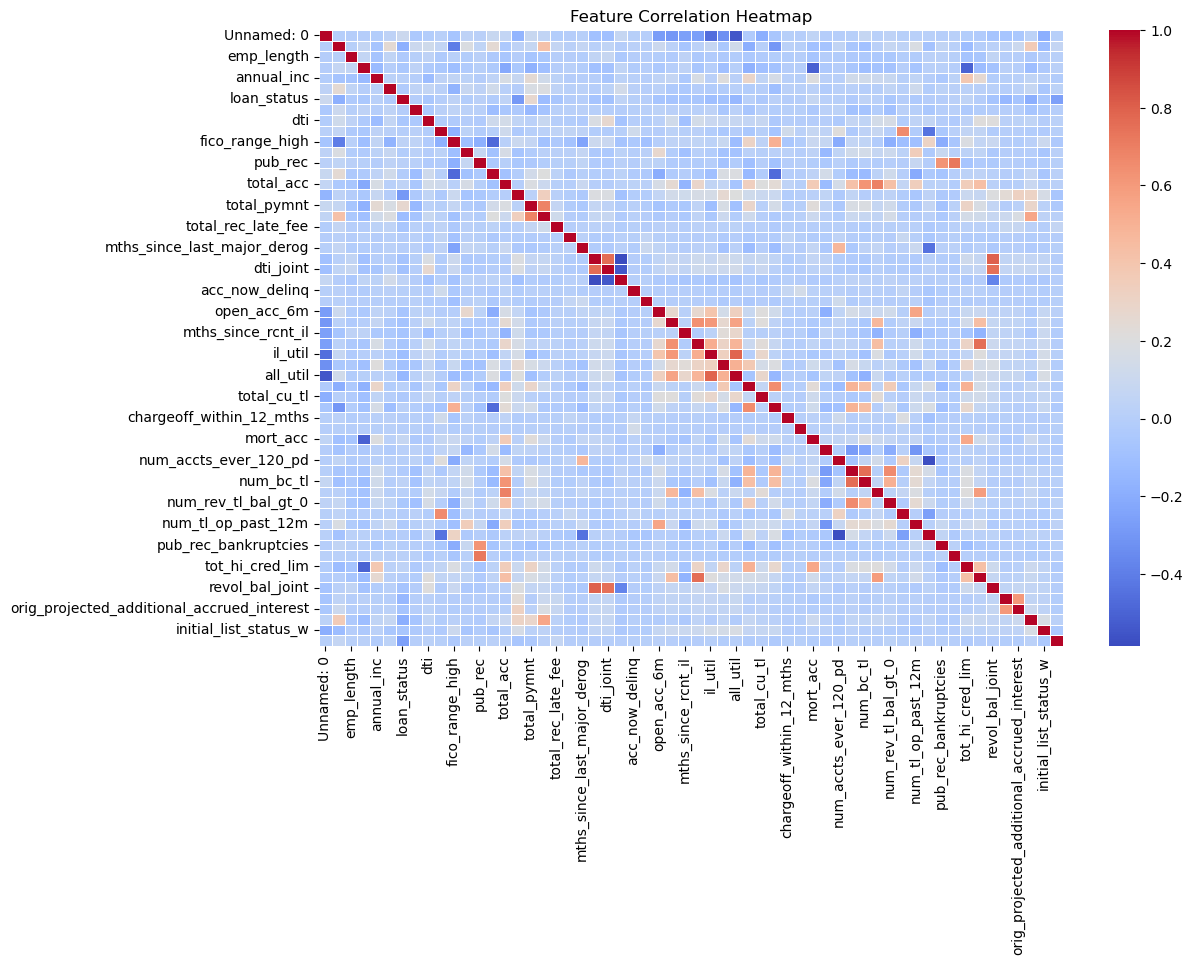

In [40]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust size for better visibility
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

#  Add title and display the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# Compute the correlation matrix
correlation_threshold = 0.80  # Set threshold for high correlation
correlation_matrix = df.corr()

# Identify highly correlated features
high_corr_pairs = set()
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:  # Check high correlation
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

# Randomly select one feature from each correlated pair to remove
for col1, col2 in high_corr_pairs:
    if col1 not in ["loan_status", "loan_amnt", "grade"] and col2 not in ["loan_status", "loan_amnt", "grade"]:  # Ensure loan_status and loan_amnt are not removed
        feature_to_remove = np.random.choice([col1, col2])  # Randomly pick one
        columns_to_drop.add(feature_to_remove)

# Drop the selected columns
df_predictions = df.drop(columns=columns_to_drop)

In [37]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101497 entries, 1774212 to 1890021
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  101497 non-null  int64  
 1   loan_amnt                                   101497 non-null  float64
 2   int_rate                                    101497 non-null  float64
 3   grade                                       101497 non-null  int64  
 4   emp_length                                  101497 non-null  int64  
 5   home_ownership                              101497 non-null  int64  
 6   annual_inc                                  101497 non-null  float64
 7   verification_status                         101497 non-null  int64  
 8   loan_status                                 101497 non-null  int64  
 9   purpose                                     101497 non-null  int64  

In [38]:
# Compute the correlation matrix
correlation_threshold = 0.80  # Set threshold for high correlation
correlation_matrix = df.corr()

# Identify highly correlated features
high_corr_pairs = set()
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:  # Check high correlation
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

# Randomly select one feature from each correlated pair to remove
for col1, col2 in high_corr_pairs:
    if col1 not in ["loan_status"] and col2 not in ["loan_status"]:  # Ensure loan_status 
        feature_to_remove = np.random.choice([col1, col2])  # Randomly pick one
        columns_to_drop.add(feature_to_remove)

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101497 entries, 1774212 to 1890021
Data columns (total 58 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  101497 non-null  int64  
 1   int_rate                                    101497 non-null  float64
 2   emp_length                                  101497 non-null  int64  
 3   home_ownership                              101497 non-null  int64  
 4   annual_inc                                  101497 non-null  float64
 5   verification_status                         101497 non-null  int64  
 6   loan_status                                 101497 non-null  int64  
 7   purpose                                     101497 non-null  int64  
 8   dti                                         101497 non-null  float64
 9   delinq_2yrs                                 101497 non-null  float64

## Standarisation of the dataset

In [41]:
#  Identify numerical features (excluding the target variable 'loan_status')
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('loan_status')  # Ensure we don’t scale the target variable

#  Apply Standard Scaling to numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#  Print to verify transformations
print("Transformed DataFrame Sample:")
df.head()

Transformed DataFrame Sample:


,Unnamed: 0,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,revol_bal_joint,deferral_term,orig_projected_additional_accrued_interest,term_ 60 months,initial_list_status_w,debt_settlement_flag_Y
1774212,-0.518811,0.098040,-1.127446,0.414304,-0.044183,0.086270,0,-0.245660,-0.721920,0.780235,...,-0.358014,-0.119969,-0.859905,-0.821870,-0.179353,-0.186606,-0.132218,-0.642496,0.596297,-0.15429
606136,0.321391,-0.602010,-1.127446,1.118539,1.289945,-1.223358,1,1.716081,-0.105491,-0.355827,...,-0.358014,-0.119969,0.005034,1.881174,-0.179353,-0.186606,-0.132218,-0.642496,0.596297,-0.15429
1916982,-0.085833,-1.185043,1.641731,1.118539,0.307366,0.086270,3,-0.245660,-0.687192,-0.355827,...,-0.358014,-0.119969,-0.835806,-0.926103,-0.179353,-0.186606,-0.132218,-0.642496,0.596297,-0.15429
1800864,-0.224610,1.021860,-0.573610,-0.994167,-0.158536,0.086270,1,0.244775,0.517616,-0.355827,...,-0.358014,-0.119969,-0.462283,0.498490,-0.179353,-0.186606,-0.132218,1.556431,0.596297,-0.15429
1409886,-0.888217,-1.579206,-1.127446,-0.994167,-0.171242,-1.223358,3,-0.736095,0.338632,-0.355827,...,-0.358014,-0.119969,-0.117593,0.204776,-0.179353,-0.186606,-0.132218,-0.642496,0.596297,-0.15429


# Model Creation

## Define the target variable (y) based on loan status
## First, let's understand the loan status categories:
- Fully Paid (3): Good loan - closed
- Current (1): Good loan - open
- Charged Off (0): Bad loan - closed
- Late (31-120 days) (6): Bad loan - open
- In Grace Period (4): Potentially bad loan - open
- Late (16-30 days) (5): Potentially bad loan - open
- Default (2): Bad loan - closed

## Create a binary target variable where:
- 1 = Good loan (Fully Paid or Current)
- 0 = Bad loan (all other statuses)


In [42]:
# Create the target variable
y = df['loan_status'].map({
    3: 1,  
    1: 1,  
    0: 0,  
    6: 0,  
    4: 0,  
    5: 0,  
    2: 0   
})

# Check the distribution of our target variable
print("Target variable distribution:")
print(y.value_counts())
print(f"Good loans: {y.value_counts()[1]} ({y.value_counts()[1]/len(y)*100:.2f}%)")
print(f"Bad loans: {y.value_counts()[0]} ({y.value_counts()[0]/len(y)*100:.2f}%)")

Target variable distribution:
loan_status
1    84961
0    16536
Name: count, dtype: int64
Good loans: 84961 (83.71%)
Bad loans: 16536 (16.29%)


Target variable distribution (closed loans only):
loan_status
1    61954
0    15701
Name: count, dtype: int64
Good loans: 61954 (79.78%)
Bad loans: 15701 (20.22%)

Target variable distribution after balancing:
loan_status
0    43357
1    43357
Name: count, dtype: int64
Good loans: 43357 (50.00%)
Bad loans: 43357 (50.00%)

Model Performance Comparison (with balanced training data):

Logistic Regression:
Training Accuracy: 0.8896
Testing Accuracy: 0.8757
Testing AUC: 0.9480
Difference (Train-Test): 0.0139

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.9187
Testing AUC: 0.9505
Difference (Train-Test): 0.0813

SVM:
Training Accuracy: 0.9628
Testing Accuracy: 0.9254
Testing AUC: 0.9699
Difference (Train-Test): 0.0374

Detailed evaluation for SVM:

Confusion Matrix:
[[ 4022   678]
 [ 1061 17536]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      4700
           1       0.96      0.94      0.95     18

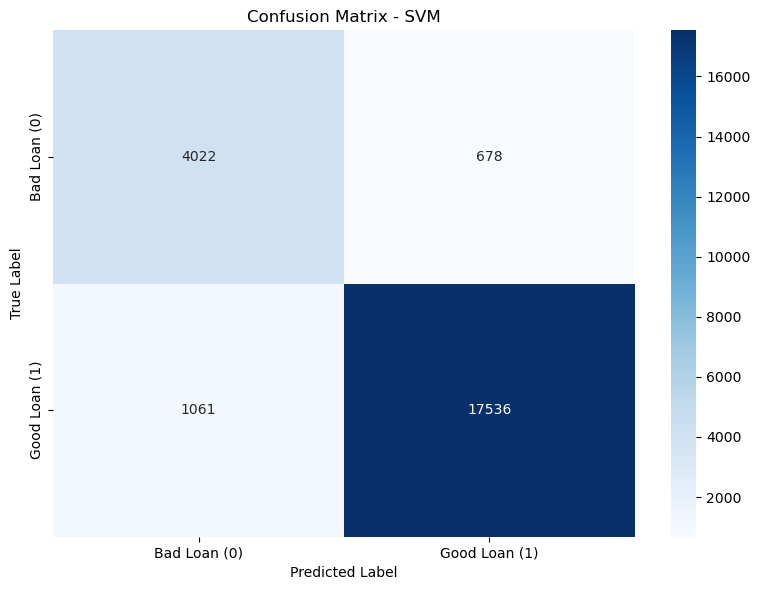

In [43]:
# Filter the dataset to include only closed loans
# Closed loans have status: Fully Paid (3), Charged Off (0), or Default (2)
closed_loans = df[df['loan_status'].isin([3, 0, 2])]

# Create a binary target variable for closed loans:
# 1 = Good loan (Fully Paid)
# 0 = Bad loan (Charged Off or Default)
y = closed_loans['loan_status'].map({
    3: 1,  # Fully Paid -> Good
    0: 0,  # Charged Off -> Bad
    2: 0   # Default -> Bad
})

# Features for our model (X)
X = closed_loans.drop('loan_status', axis=1)

# Check the distribution of our target variable
print("Target variable distribution (closed loans only):")
print(y.value_counts())
print(f"Good loans: {y.value_counts()[1]} ({y.value_counts()[1]/len(y)*100:.2f}%)")
print(f"Bad loans: {y.value_counts()[0]} ({y.value_counts()[0]/len(y)*100:.2f}%)")

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data using SMOTE (Synthetic Minority Over-sampling Technique)

# Create a pipeline with SMOTE for oversampling the minority class
# and RandomUnderSampler for undersampling the majority class
# This combined approach often works better than either technique alone
balancing_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under_sampler', RandomUnderSampler(random_state=42))
])

# Apply the balancing pipeline to the training data
X_train_balanced, y_train_balanced = balancing_pipeline.fit_resample(X_train, y_train)

# Check the distribution after balancing
print("\nTarget variable distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())
print(f"Good loans: {pd.Series(y_train_balanced).value_counts()[1]} ({pd.Series(y_train_balanced).value_counts()[1]/len(y_train_balanced)*100:.2f}%)")
print(f"Bad loans: {pd.Series(y_train_balanced).value_counts()[0]} ({pd.Series(y_train_balanced).value_counts()[0]/len(y_train_balanced)*100:.2f}%)")

# Train and evaluate multiple classification models

# Dictionary to store model results
model_results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_balanced, y_train_balanced)
lr_train_pred = lr.predict(X_train_balanced)
lr_test_pred = lr.predict(X_test)
model_results['Logistic Regression'] = {
    'train_accuracy': accuracy_score(y_train_balanced, lr_train_pred),
    'test_accuracy': accuracy_score(y_test, lr_test_pred),
    'test_auc': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
rf_train_pred = rf.predict(X_train_balanced)
rf_test_pred = rf.predict(X_test)
model_results['Random Forest'] = {
    'train_accuracy': accuracy_score(y_train_balanced, rf_train_pred),
    'test_accuracy': accuracy_score(y_test, rf_test_pred),
    'test_auc': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
}

# Support Vector Machine
svc = SVC(random_state=42, probability=True)
svc.fit(X_train_balanced, y_train_balanced)
svc_train_pred = svc.predict(X_train_balanced)
svc_test_pred = svc.predict(X_test)
model_results['SVM'] = {
    'train_accuracy': accuracy_score(y_train_balanced, svc_train_pred),
    'test_accuracy': accuracy_score(y_test, svc_test_pred),
    'test_auc': roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
}

# Print model comparison results
print("\nModel Performance Comparison (with balanced training data):")
for model_name, results in model_results.items():
    print(f"\n{model_name}:")
    print(f"Training Accuracy: {results['train_accuracy']:.4f}")
    print(f"Testing Accuracy: {results['test_accuracy']:.4f}")
    print(f"Testing AUC: {results['test_auc']:.4f}")
    print(f"Difference (Train-Test): {results['train_accuracy'] - results['test_accuracy']:.4f}")

# Print detailed evaluation for the best performing model
# Using AUC as the primary metric for imbalanced classification
best_model = max(model_results.items(), key=lambda x: x[1]['test_auc'])[0]
print(f"\nDetailed evaluation for {best_model}:")
if best_model == 'Logistic Regression':
    y_pred = lr_test_pred
    y_proba = lr.predict_proba(X_test)[:, 1]
elif best_model == 'Random Forest':
    y_pred = rf_test_pred
    y_proba = rf.predict_proba(X_test)[:, 1]
else:
    y_pred = svc_test_pred
    y_proba = svc.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Calculate precision-recall AUC (especially important for imbalanced datasets)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad Loan (0)', 'Good Loan (1)'],
            yticklabels=['Bad Loan (0)', 'Good Loan (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {best_model}')
plt.tight_layout()
plt.show()


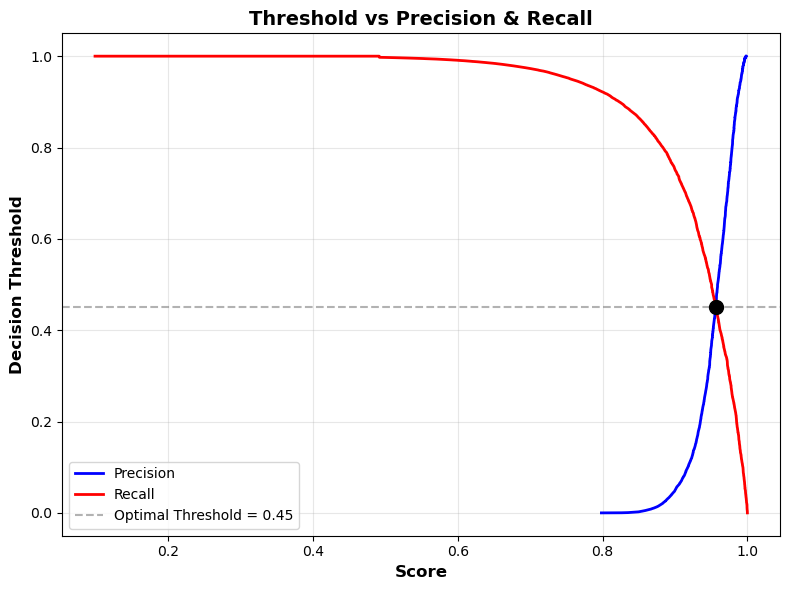

In [112]:
# Step 1: Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Step 2: Find threshold where precision ≈ recall
intersection_idx = np.argmin(np.abs(precision[:-1] - recall[:-1]))
optimal_threshold = thresholds[intersection_idx]

# Step 3: Plot with swapped axes
plt.figure(figsize=(8, 6))
plt.plot(precision[:-1], thresholds, label="Precision", color='blue', linewidth=2)
plt.plot(recall[:-1], thresholds, label="Recall", color='red', linewidth=2)
plt.axhline(optimal_threshold, linestyle='dashed', color='gray', alpha=0.6,
            label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.scatter(precision[intersection_idx], optimal_threshold, color='black', s=100, zorder=3)

# Step 4: Formatting
plt.xlabel("Score", fontsize=12, fontweight='bold')  # Precision / Recall
plt.ylabel("Decision Threshold", fontsize=12, fontweight='bold')
plt.title("Threshold vs Precision & Recall", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

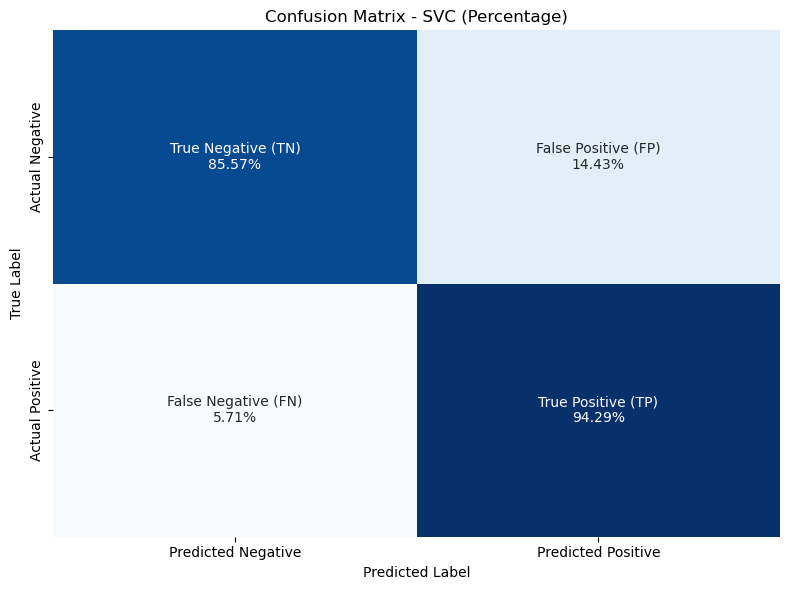

In [89]:
# Compute confusion matrix
cm = confusion_matrix(y_test, svc_test_pred)
tn, fp, fn, tp = cm.ravel()

# Convert to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Define labels
labels = np.array([
    [f"True Negative (TN)\n{cm_percent[0,0]:.2f}%", f"False Positive (FP)\n{cm_percent[0,1]:.2f}%"],
    [f"False Negative (FN)\n{cm_percent[1,0]:.2f}%", f"True Positive (TP)\n{cm_percent[1,1]:.2f}%"]
])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=labels, fmt="", cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVC (Percentage)")
plt.tight_layout()
plt.show()

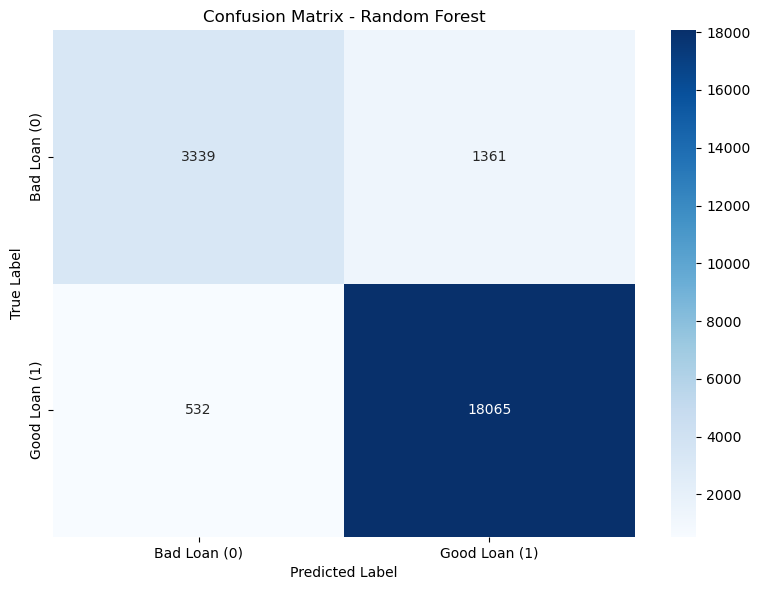

In [44]:

# Get predictions for the new model (e.g., SVM)
y_pred_rf = rf_test_pred

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad Loan (0)', 'Good Loan (1)'],
            yticklabels=['Bad Loan (0)', 'Good Loan (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

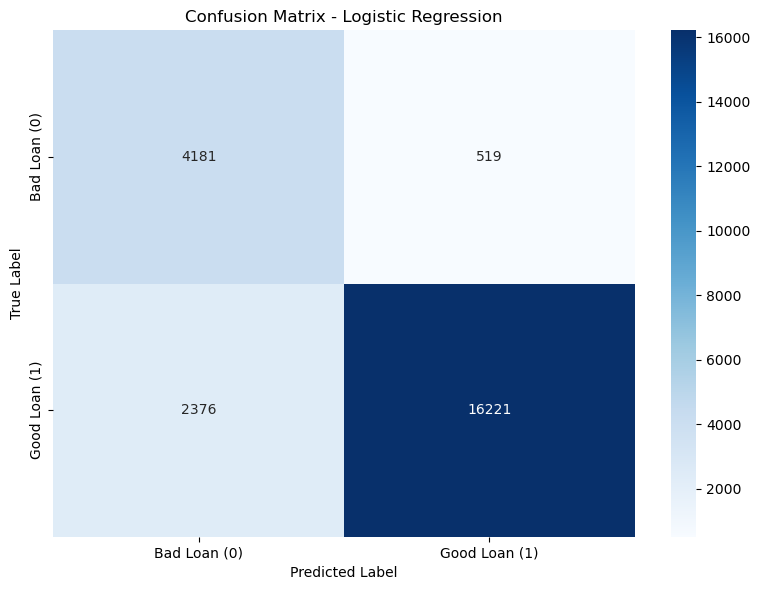

In [45]:
# Get predictions for the new model (e.g., SVM)
y_pred_lr = lr_test_pred

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad Loan (0)', 'Good Loan (1)'],
            yticklabels=['Bad Loan (0)', 'Good Loan (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

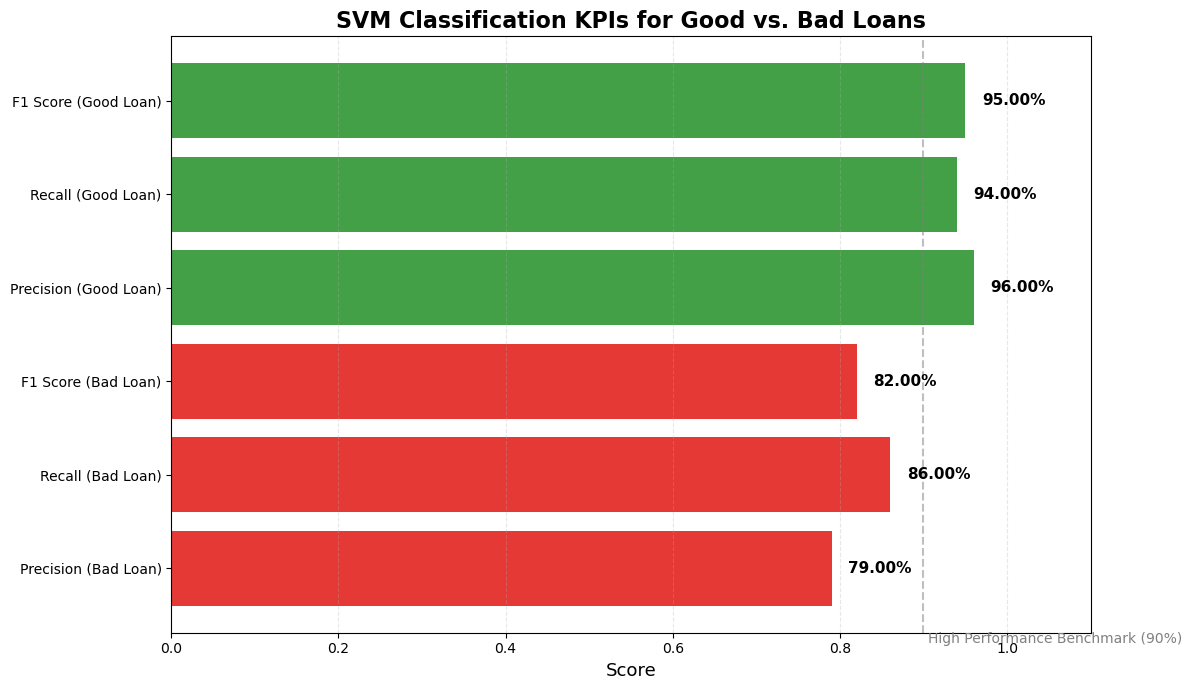

In [114]:


# KPI values from your confusion matrix / classification report
metrics_labels = [
    'Precision (Bad Loan)', 'Recall (Bad Loan)', 'F1 Score (Bad Loan)',
    'Precision (Good Loan)', 'Recall (Good Loan)', 'F1 Score (Good Loan)'
]
scores = [0.79, 0.86, 0.82, 0.96, 0.94, 0.95]
colors = ['#e53935', '#e53935', '#e53935', '#43a047', '#43a047', '#43a047']

# Create horizontal bar chart
plt.figure(figsize=(12, 7))
bars = plt.barh(metrics_labels, scores, color=colors)
plt.xlim(0, 1.1)
plt.xlabel('Score', fontsize=13)
plt.title('SVM Classification KPIs for Good vs. Bad Loans', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Annotate bars with score %
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height() / 2,
             f'{width:.2%}', va='center', ha='left', fontsize=11, fontweight='bold')

# Optional: High-performance threshold line
plt.axvline(0.90, color='gray', linestyle='--', alpha=0.5)
plt.text(0.905, -0.8, 'High Performance Benchmark (90%)', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

# Predicting with Open Loans

In [90]:
# STEP 1: Filter only open loans in df_predictions
open_loans = df_predictions[df_predictions['loan_status'].isin([1, 4, 5, 6])].copy()

# STEP 2: Scale the features using the same scaler as the training data
feature_columns = X_train.columns
scaler = StandardScaler()
X_open_scaled = scaler.fit_transform(open_loans[feature_columns])

# STEP 3: Predict with your SVM model
open_loans['predicted_status'] = svc.predict(X_open_scaled)  # 0 = default, 1 = fully paid
open_loans['default_risk_prob'] = svc.predict_proba(X_open_scaled)[:, 0]  # probability of default

# STEP 4: Estimate Financial Impact using 72.8% recovery (i.e., 27.2% loss)
late_loans = open_loans[open_loans['predicted_status'] == 0]
in_time_loans = open_loans[open_loans['predicted_status'] == 1]

total_amount = open_loans['loan_amnt'].sum()
late_amount = late_loans['loan_amnt'].sum()
in_time_amount = in_time_loans['loan_amnt'].sum()

# Revenue = sum of interest from in-time loans
expected_revenue = (in_time_loans['loan_amnt'] * in_time_loans['int_rate'] / 100).sum()

# Adjusted loss = 27.2% of total at-risk principal
recovery_rate = 0.728
expected_loss = late_amount * (1 - recovery_rate)

# Final net return
net_return = expected_revenue - expected_loss

# STEP 5: Print Summary
print("\n📊 Open Loan Portfolio Impact (Recovery Rate = 72.8%):")
print(f"Total open loans: ${total_amount:,.2f}")
print(f"✅ Predicted Fully Paid: {len(in_time_loans)} loans | ${in_time_amount:,.2f}")
print(f"❌ Predicted Defaults: {len(late_loans)} loans | ${late_amount:,.2f}")
print(f"💵 Expected Revenue: ${expected_revenue:,.2f}")
print(f"📉 Expected Loss (after recovery): ${expected_loss:,.2f}")
print(f"📈 Net Return: ${net_return:,.2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



📊 Open Loan Portfolio Impact (Recovery Rate = 72.8%):
Total open loans: $399,902,000.00
✅ Predicted Fully Paid: 17236 loans | $273,466,900.00
❌ Predicted Defaults: 6606 loans | $126,435,100.00
💵 Expected Revenue: $32,603,035.95
📉 Expected Loss (after recovery): $34,390,347.20
📈 Net Return: $-1,787,311.25


/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/906802924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Fully Paid", "Defaulted"], y=[in_time_amount, late_amount], palette=["#4caf50", "#f44336"])


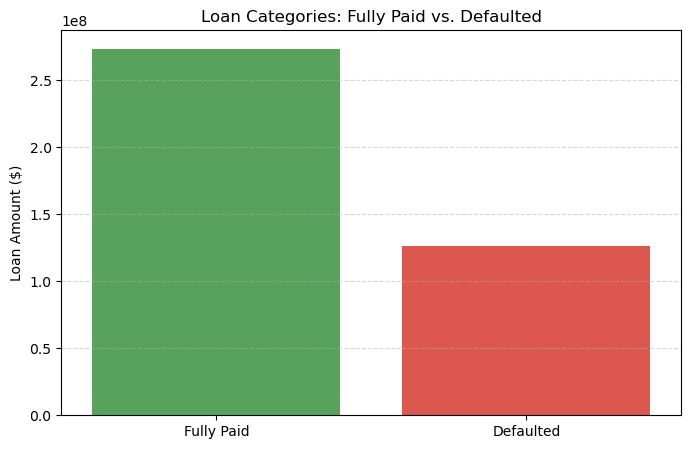

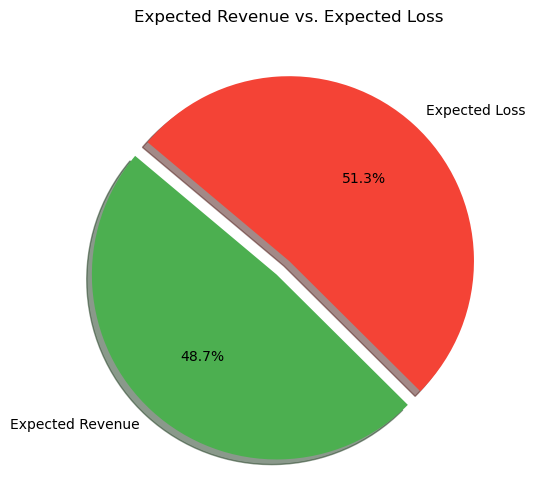

In [91]:
# STEP 6: Bar Chart - Fully Paid vs. Defaulted
plt.figure(figsize=(8, 5))
sns.barplot(x=["Fully Paid", "Defaulted"], y=[in_time_amount, late_amount], palette=["#4caf50", "#f44336"])
plt.title("Loan Categories: Fully Paid vs. Defaulted")
plt.ylabel("Loan Amount ($)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# STEP 7: Pie Chart - Expected Revenue vs. Expected Loss
labels = ["Expected Revenue", "Expected Loss"]
sizes = [expected_revenue, expected_loss]
colors = ["#4caf50", "#f44336"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0.1, 0), shadow=True)
plt.title("Expected Revenue vs. Expected Loss")
plt.show()


In [47]:
# 1. Define the list of missing features
missing_features = ['revol_util', 'total_pymnt', 'annual_inc_joint', 
                    'bc_open_to_buy', 'num_rev_tl_bal_gt_0', 'total_il_high_credit_limit']

# 2. Loop through and fill missing columns from df
for col in missing_features:
    if col in df.columns:
        df_predictions[col] = df.loc[df_predictions.index, col]
    else:
        print(f" Column '{col}' not found in df.")

## Filter and Prepare Open Loans

In [113]:
# STEP 1: Filter only open loans in df_predictions
open_loans = df_predictions[df_predictions['loan_status'].isin([1, 4, 5, 6])].copy()

# STEP 2: Scale the features using the same scaler as the training data
feature_columns = X_train.columns
scaler = StandardScaler()
X_open_scaled = scaler.fit_transform(open_loans[feature_columns])

# STEP 3: Predict with your SVM model
open_loans['predicted_status'] = svc.predict(X_open_scaled)  # 0 = default, 1 = fully paid
open_loans['default_risk_prob'] = svc.predict_proba(X_open_scaled)[:, 0]  # probability of default

# STEP 4: Estimate Financial Impact using 72.8% recovery (i.e., 27.2% loss)
late_loans = open_loans[open_loans['predicted_status'] == 0]
in_time_loans = open_loans[open_loans['predicted_status'] == 1]

total_amount = open_loans['loan_amnt'].sum()
late_amount = late_loans['loan_amnt'].sum()
in_time_amount = in_time_loans['loan_amnt'].sum()

# Revenue = sum of interest from in-time loans
expected_revenue = (in_time_loans['loan_amnt'] * in_time_loans['int_rate'] / 100).sum()

# Adjusted loss = 27.2% of total at-risk principal
recovery_rate = 0.728
expected_loss = late_amount * (1 - recovery_rate)

# Final net return
net_return = expected_revenue - expected_loss

# STEP 5: Print Summary
print("\n Open Loan Portfolio Impact (Recovery Rate = 72.8%):")
print(f" Total open loans: ${total_amount:,.2f}")
print(f" Predicted Fully Paid: {len(in_time_loans)} loans | ${in_time_amount:,.2f}")
print(f" Predicted Defaults: {len(late_loans)} loans | ${late_amount:,.2f}")
print(f" Expected Revenue: ${expected_revenue:,.2f}")
print(f" Expected Loss (after recovery): ${expected_loss:,.2f}")
print(f" Net Return: ${net_return:,.2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



 Open Loan Portfolio Impact (Recovery Rate = 72.8%):
 Total open loans: $399,902,000.00
 Predicted Fully Paid: 17236 loans | $273,466,900.00
 Predicted Defaults: 6606 loans | $126,435,100.00
 Expected Revenue: $32,603,035.95
 Expected Loss (after recovery): $34,390,347.20
 Net Return: $-1,787,311.25


## Strategy evaluation function

In [72]:
def evaluate_strategy(open_loans, grades, recovery_rate=0.728, strategy_name=""):
    strategy_df = open_loans[open_loans['grade'].isin(grades)].copy()

    # Segment predicted outcomes
    late_loans = strategy_df[strategy_df['predicted_status'] == 0]
    in_time_loans = strategy_df[strategy_df['predicted_status'] == 1]

    # Financial calculations
    total_amount = strategy_df['loan_amnt'].sum()
    late_amount = late_loans['loan_amnt'].sum()
    in_time_amount = in_time_loans['loan_amnt'].sum()
    expected_revenue = (in_time_loans['loan_amnt'] * in_time_loans['int_rate'] / 100).sum()
    expected_loss = late_amount * (1 - recovery_rate)
    net_return = expected_revenue - expected_loss

    # Print the strategy summary
    print(f"\n📊 Strategy Evaluation for {strategy_name} (Grades {grades})")
    print(f"Total loans: {len(strategy_df)} | Total amount: ${total_amount:,.2f}")
    print(f"✅ Predicted Fully Paid: {len(in_time_loans)} | ${in_time_amount:,.2f}")
    print(f"❌ Predicted Defaults: {len(late_loans)} | ${late_amount:,.2f}")
    print(f"💵 Expected Revenue: ${expected_revenue:,.2f}")
    print(f"📉 Expected Loss (27.2% of defaults): ${expected_loss:,.2f}")
    print(f"📈 Net Return: ${net_return:,.2f}")

    return {
        "strategy": strategy_name,
        "grades": grades,
        "total_amount": total_amount,
        "net_return": net_return,
        "expected_revenue": expected_revenue,
        "expected_loss": expected_loss,
        "defaulted_amount": late_amount
    }

## Conservative Strategy

In [77]:
conservative_summary = evaluate_strategy(
    open_loans=open_loans,
    grades=[0, 1], #A = 1, B = 
    strategy_name="Conservative"
)


📊 Strategy Evaluation for Conservative (Grades [0, 1])
Total loans: 12355 | Total amount: $203,976,150.00
✅ Predicted Fully Paid: 10430 | $164,058,525.00
❌ Predicted Defaults: 1925 | $39,917,625.00
💵 Expected Revenue: $14,465,143.69
📉 Expected Loss (27.2% of defaults): $10,857,594.00
📈 Net Return: $3,607,549.69


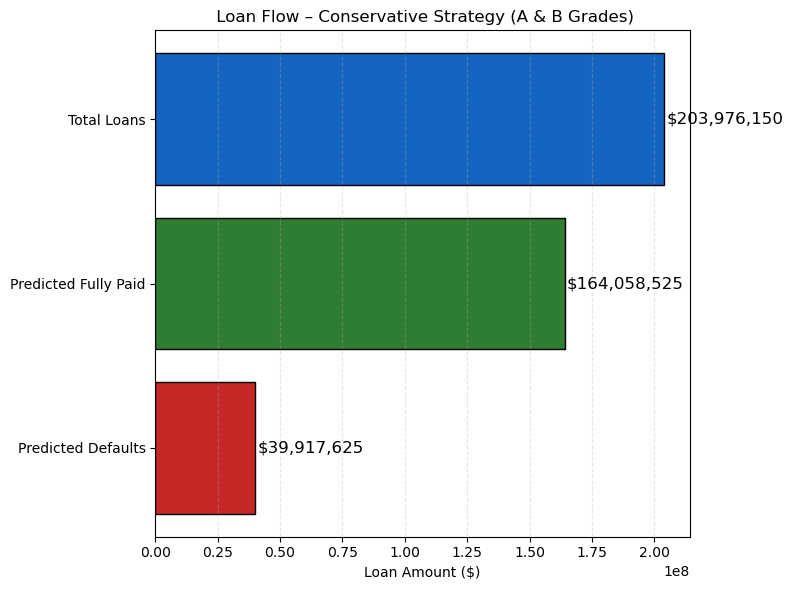

In [97]:
# Step values
steps = [
    ("Total Loans", 203_976_150),
    ("Predicted Fully Paid", 164_058_525),
    ("Predicted Defaults", 39_917_625)
]

# Create lists for plotting
labels, values = zip(*steps)
colors = ["#1565C0", "#2E7D32", "#C62828"]

# Plot funnel
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(values)):
    ax.barh(y=i, width=values[i], color=colors[i], edgecolor='black')
    ax.text(values[i] + 1_000_000, i, f"${values[i]:,.0f}", va='center', fontsize=12)

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.invert_yaxis()  # Highest value on top
ax.set_xlabel("Loan Amount ($)")
ax.set_title(" Loan Flow – Conservative Strategy (A & B Grades)")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Balanced Strategy

In [78]:
balanced_summary = evaluate_strategy(
    open_loans=open_loans,
    grades=[1, 2, 3], # B = 1, C = 2, D = 3
    strategy_name="Balanced"
)


📊 Strategy Evaluation for Balanced (Grades [1, 2, 3])
Total loans: 17129 | Total amount: $289,608,475.00
✅ Predicted Fully Paid: 11318 | $177,191,425.00
❌ Predicted Defaults: 5811 | $112,417,050.00
💵 Expected Revenue: $23,442,312.06
📉 Expected Loss (27.2% of defaults): $30,577,437.60
📈 Net Return: $-7,135,125.54


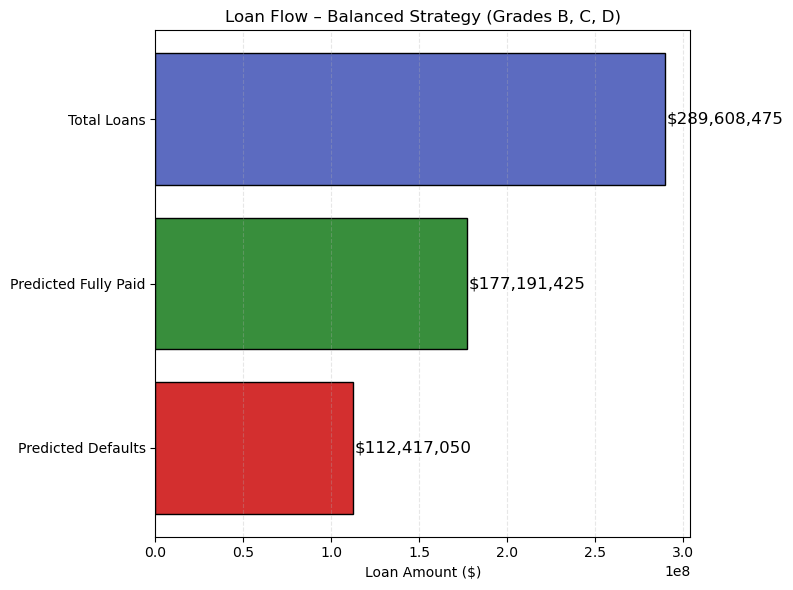

In [98]:
# Step values
steps = [
    ("Total Loans", 289_608_475),
    ("Predicted Fully Paid", 177_191_425),
    ("Predicted Defaults", 112_417_050)
]

# Create lists for plotting
labels, values = zip(*steps)
colors = ["#5C6BC0", "#388E3C", "#D32F2F"]

# Plot funnel
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(values)):
    ax.barh(y=i, width=values[i], color=colors[i], edgecolor='black')
    ax.text(values[i] + 1_000_000, i, f"${values[i]:,.0f}", va='center', fontsize=12)

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.invert_yaxis()  # Highest value on top
ax.set_xlabel("Loan Amount ($)")
ax.set_title("Loan Flow – Balanced Strategy (Grades B, C, D)")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Aggressive Strategy

In [79]:
aggressive_summary = evaluate_strategy(
    open_loans=open_loans,
    grades=[4, 5, 6], #  E = 4, F = 5, G = 6
    strategy_name="Aggressive"
)


📊 Strategy Evaluation for Aggressive (Grades [4, 5, 6])
Total loans: 1275 | Total amount: $22,635,575.00
✅ Predicted Fully Paid: 774 | $14,272,125.00
❌ Predicted Defaults: 501 | $8,363,450.00
💵 Expected Revenue: $3,401,057.34
📉 Expected Loss (27.2% of defaults): $2,274,858.40
📈 Net Return: $1,126,198.94


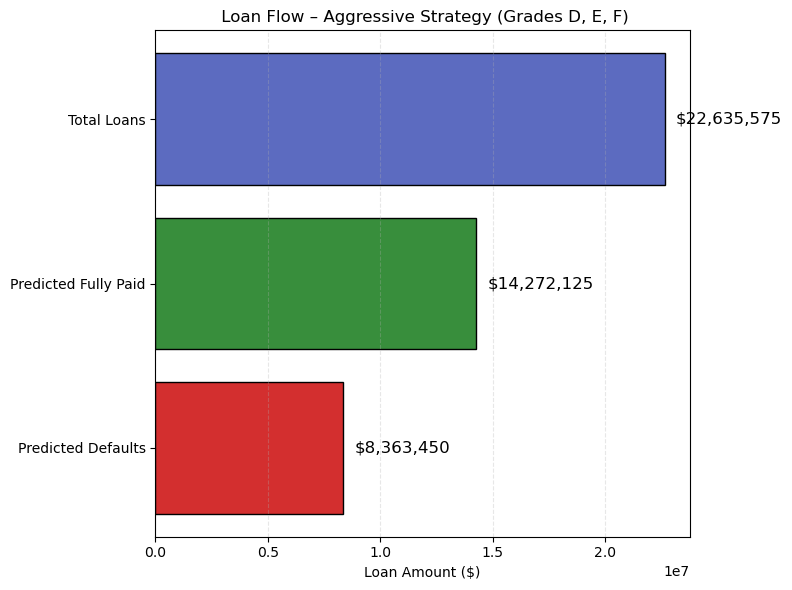

In [104]:
# Step values
steps = [
    ("Total Loans", 22_635_575),
    ("Predicted Fully Paid", 14_272_125),
    ("Predicted Defaults", 8_363_450)
]

# Create lists for plotting
labels, values = zip(*steps)
colors = ["#5C6BC0", "#388E3C", "#D32F2F"]  # purple, teal, red

# Plot funnel
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(values)):
    ax.barh(y=i, width=values[i], color=colors[i], edgecolor='black')
    ax.text(values[i] + 500_000, i, f"${values[i]:,.0f}", va='center', fontsize=12)  # ✅ FIXED LINE

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.invert_yaxis()  # Highest value on top
ax.set_xlabel("Loan Amount ($)")
ax.set_title(" Loan Flow – Aggressive Strategy (Grades D, E, F)")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/3406808798.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/3406808798.py:40: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/3406808798.py:40: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/3406808798.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:17

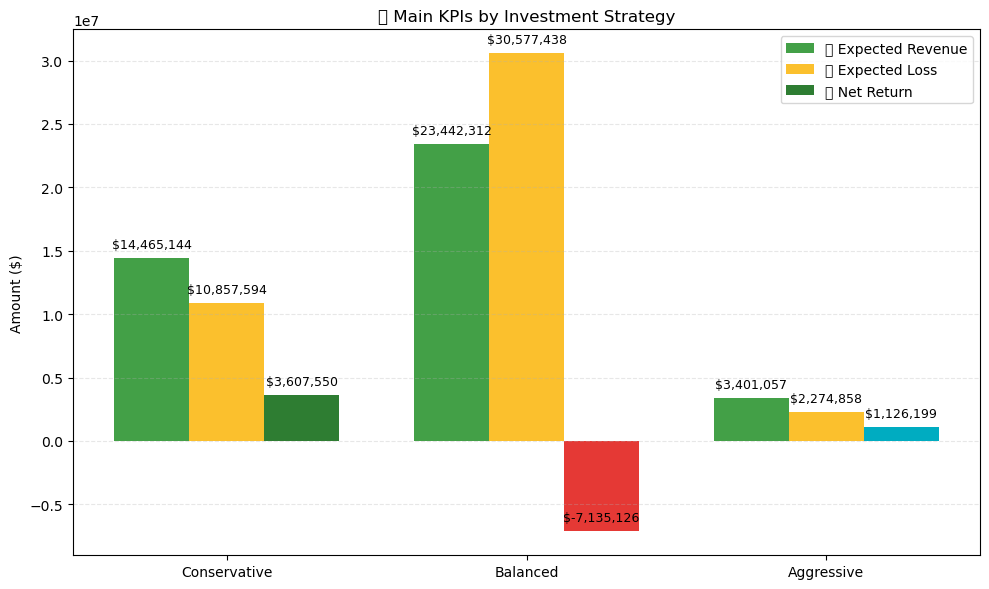

In [103]:
# Strategy names
strategies = ["Conservative", "Balanced", "Aggressive"]

# Main KPIs (in same order)
expected_revenue = [14_465_144, 23_442_312, 3_401_057]
expected_loss = [10_857_594, 30_577_438, 2_274_858]
net_return = [3_607_550, -7_135_126, 1_126_199]

x = np.arange(len(strategies))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Bars
bar1 = ax.bar(x - width, expected_revenue, width, label='💵 Expected Revenue', color="#43A047")
bar2 = ax.bar(x, expected_loss, width, label='📉 Expected Loss', color="#FBC02D")
bar3 = ax.bar(x + width, net_return, width, label='📈 Net Return',
              color=["#2E7D32", "#E53935", "#00ACC1"])

# Annotate
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Format
ax.set_ylabel("Amount ($)")
ax.set_title("📊 Main KPIs by Investment Strategy")
ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/0_/dkddbgs91mx2f7kmhdmgss0m0000gn/T/ipykernel_19839/950520923.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


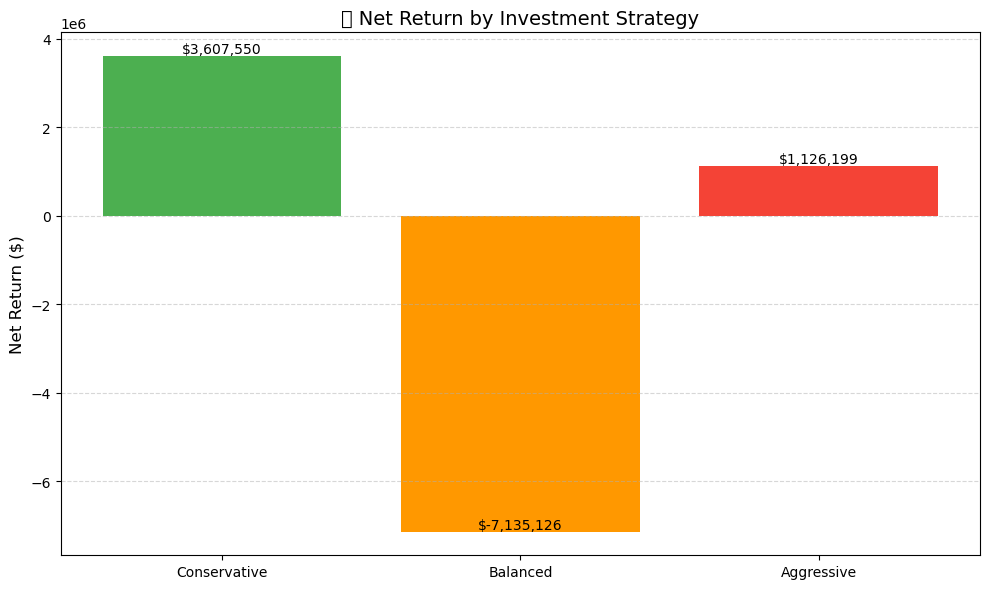

In [80]:
# Combine strategy summaries
strategy_data = [conservative_summary, balanced_summary, aggressive_summary]

# Extract values for plotting
strategies = [d['strategy'] for d in strategy_data]
net_returns = [d['net_return'] for d in strategy_data]
losses = [d['expected_loss'] for d in strategy_data]
revenues = [d['expected_revenue'] for d in strategy_data]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(strategies, net_returns, color=['#4caf50', '#ff9800', '#f44336'])

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("📈 Net Return by Investment Strategy", fontsize=14)
plt.ylabel("Net Return ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

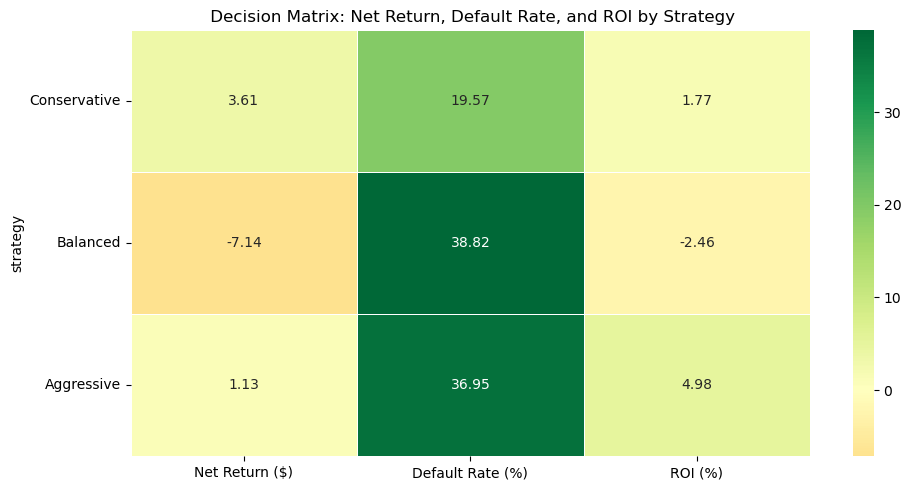

In [105]:
# Strategy data loaded externally
data = [
    conservative_summary,
    balanced_summary,
    aggressive_summary
]

# Convert to DataFrame
strategy_df = pd.DataFrame(data)
strategy_df.set_index("strategy", inplace=True)

# Calculate default rate and ROI
strategy_df["Default Rate (%)"] = strategy_df["defaulted_amount"] / strategy_df["total_amount"] * 100
strategy_df["ROI (%)"] = strategy_df["net_return"] / strategy_df["total_amount"] * 100

# Create heatmap matrix for decision making
matrix_df = strategy_df[["net_return", "Default Rate (%)", "ROI (%)"]].copy()
matrix_df.rename(columns={"net_return": "Net Return ($)"}, inplace=True)
matrix_df["Net Return ($)"] = matrix_df["Net Return ($)"] / 1_000_000  # scale for color readability

plt.figure(figsize=(10, 5))
sns.heatmap(matrix_df, annot=matrix_df.round(2), fmt='', cmap="RdYlGn", center=0, linewidths=0.5)
plt.title(" Decision Matrix: Net Return, Default Rate, and ROI by Strategy")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()